<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Data-Source" data-toc-modified-id="The-Data-Source-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Data Source</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Evaluation-(Explanatory-Data-Analysis)" data-toc-modified-id="Evaluation-(Explanatory-Data-Analysis)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation (Explanatory Data Analysis)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Note:" data-toc-modified-id="Note:-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Note:</a></span></li><li><span><a href="#Note:" data-toc-modified-id="Note:-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Note:</a></span></li></ul></li><li><span><a href="#Annual-Income" data-toc-modified-id="Annual-Income-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Annual Income</a></span></li><li><span><a href="#Default-Rate-and-Grade" data-toc-modified-id="Default-Rate-and-Grade-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Default Rate and Grade</a></span></li><li><span><a href="#Interest-Rate" data-toc-modified-id="Interest-Rate-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Interest Rate</a></span><ul class="toc-item"><li><span><a href="#Return-on-Investment-(ROI)" data-toc-modified-id="Return-on-Investment-(ROI)-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Return on Investment (ROI)</a></span></li><li><span><a href="#Notes:" data-toc-modified-id="Notes:-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Notes:</a></span></li></ul></li><li><span><a href="#Employment-History" data-toc-modified-id="Employment-History-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Employment History</a></span></li><li><span><a href="#Funded-Amount" data-toc-modified-id="Funded-Amount-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Funded Amount</a></span></li><li><span><a href="#Annual-Income" data-toc-modified-id="Annual-Income-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Annual Income</a></span><ul class="toc-item"><li><span><a href="#Notes---histogram,-scatterplot" data-toc-modified-id="Notes---histogram,-scatterplot-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Notes - histogram, scatterplot</a></span></li></ul></li><li><span><a href="#Term" data-toc-modified-id="Term-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Term</a></span></li><li><span><a href="#Home-Ownership" data-toc-modified-id="Home-Ownership-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Home Ownership</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#State-Address" data-toc-modified-id="State-Address-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>State Address</a></span></li><li><span><a href="#dti" data-toc-modified-id="dti-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>dti</a></span></li></ul></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation</a></span></li></ul></div>

## The Data Source

Source: https://www.lendingclub.com/info/download-data.action

LendingClub is a peer-to-peer lending company with its headquarters in San Francisco, California, began by operating as an online consumer-lending platform that enables borrowers to obtain an unsecured loan that's funded by individuals and insititutions. 

- The data from LendingClub is from 2007 to 2018Q4. 

## Problem Statement
The goal, using Machine Learning models and some of the features in the data set, is to determine if someone defaulting on their loan.

In [175]:
#import libraries
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
#import re
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split
# Import logistic regression
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [176]:
#import the data
loan2 = pd.read_csv('./LoanStats/loans_with_date.csv', low_memory=False)

There are 149 features in this dataset.  Some of them were used in the loan process.  We streamlined the features that are important for this analysis and created a new dataset.   

## Data Cleaning

In [177]:
print(f' The shape of the data is {loan2.shape}')
loan2.head()

 The shape of the data is (2260701, 19)


,Unnamed: 0,funded_amnt,emp_length,annual_inc,loan_status,loan_amnt,home_ownership,int_rate,addr_state,grade,term,installment,sub_grade,total_pymnt,issue_d,funded_amnt_inv,purpose,dti,zip_code
0,0,3600.0,10+ years,55000.0,Fully Paid,3600.0,MORTGAGE,13.99,PA,C,36 months,123.03,C4,4421.723917,Dec-2015,3600.0,debt_consolidation,5.91,190xx
1,1,24700.0,10+ years,65000.0,Fully Paid,24700.0,MORTGAGE,11.99,SD,C,36 months,820.28,C1,25679.660000,Dec-2015,24700.0,small_business,16.06,577xx
2,2,20000.0,10+ years,63000.0,Fully Paid,20000.0,MORTGAGE,10.78,IL,B,60 months,432.66,B4,22705.924294,Dec-2015,20000.0,home_improvement,10.78,605xx
3,3,35000.0,10+ years,110000.0,Current,35000.0,MORTGAGE,14.85,NJ,C,60 months,829.90,C5,31464.010000,Dec-2015,35000.0,debt_consolidation,17.06,076xx
4,4,10400.0,3 years,104433.0,Fully Paid,10400.0,MORTGAGE,22.45,PA,F,60 months,289.91,F1,11740.500000,Dec-2015,10400.0,major_purchase,25.37,174xx


In [178]:
#removed the Unnamed Column
loan2.drop(columns=['Unnamed: 0'], inplace=True)

In [179]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   funded_amnt      float64
 1   emp_length       object 
 2   annual_inc       float64
 3   loan_status      object 
 4   loan_amnt        float64
 5   home_ownership   object 
 6   int_rate         float64
 7   addr_state       object 
 8   grade            object 
 9   term             object 
 10  installment      float64
 11  sub_grade        object 
 12  total_pymnt      float64
 13  issue_d          object 
 14  funded_amnt_inv  float64
 15  purpose          object 
 16  dti              float64
 17  zip_code         object 
dtypes: float64(8), object(10)
memory usage: 310.5+ MB


In [180]:
loan2.isnull().sum()

funded_amnt            33
emp_length         146940
annual_inc             37
loan_status            33
loan_amnt              33
home_ownership         33
int_rate               33
addr_state             33
grade                  33
term                   33
installment            33
sub_grade              33
total_pymnt            33
issue_d                33
funded_amnt_inv        33
purpose                33
dti                  1744
zip_code               34
dtype: int64

In [181]:
#drop 147058 rows that contained many null values
loan2.dropna(inplace=True)

In [182]:
loan2.shape

(2113643, 18)

## Evaluation (Explanatory Data Analysis)

In [183]:
loan2.loan_status.value_counts()

Fully Paid                                             1019355
Current                                                 812752
Charged Off                                             247426
Late (31-120 days)                                       19616
In Grace Period                                           7849
Late (16-30 days)                                         3899
Does not meet the credit policy. Status:Fully Paid        1965
Does not meet the credit policy. Status:Charged Off        746
Default                                                     35
Name: loan_status, dtype: int64

In [184]:
loan2.drop(loan2[loan2['loan_status']=='Does not meet the credit policy. Status:Fully Paid'].index, inplace=True)
loan2.drop(loan2[loan2['loan_status']=='Does not meet the credit policy. Status:Charged Off'].index, inplace=True)
loan2.drop(loan2[loan2['loan_status']== 0].index, inplace=True)

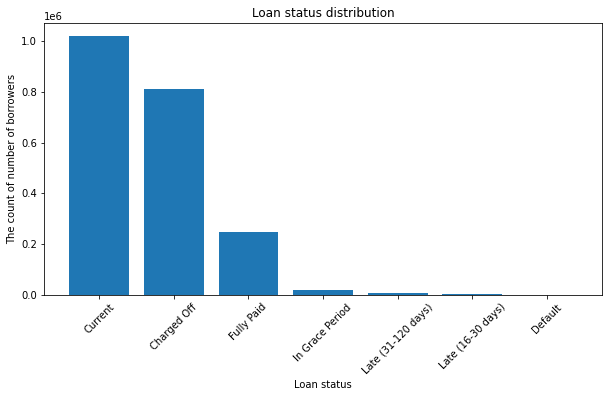

In [185]:
plt.figure(figsize=(10,5))
plt.bar(['Current', 'Charged Off', 'Fully Paid', 
        'In Grace Period',
        'Late (31-120 days)', 'Late (16-30 days)', 'Default'],
        loan2['loan_status'].value_counts());
plt.xticks(rotation = 45);
plt.xlabel('Loan status');
plt.ylabel('The count of number of borrowers')
plt.title('Loan status distribution');

#### Note:

There are a lot of loans which are current with an ok amount of fully paid loans.  The other categories and default are really low.  
We dropped (3) classes from loan_status because they did not "meet credit policy" (Does not meet the credit policy. Status:Fully Paid, Does not meet the credit policy. Status:Charged Off).


In [186]:
loan2['loan_status_1'] = loan2['loan_status'].map({"Current": 2,
                                    "Fully Paid": 1, "In Grace Period": 0, 
                                    "Late (16-30 days)": 0, 
                                    "Late (31-120 days)": 0,
                                    "Charged Off" : 0, "Default" : 0
                                                      })

In [187]:
# Remove all loans that are Current
# We only want to keep Late or Fully Paid
loan2 = loan2[loan2['loan_status_1'] != 2]

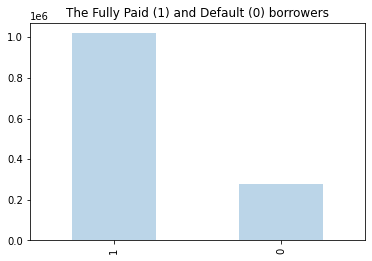

In [188]:
loan2.loan_status_1.value_counts().plot(kind='bar',alpha=.30);
plt.title('The Fully Paid (1) and Default (0) borrowers');

#### Note:

Fully Paid in loan status is the target variable.
We only need to know who Fully Paid their loan, or who is in default.  Anyone who is CURRENT doesn't matter for our analysis purposes.  We only care about those who have PAID or those who are in DEFAULT.

We mapped values in the loan_status as: Fully Paid = 1, Current = 2 and the remainders, 0.

In [189]:
#removing Current from the evaluation reduced the shape by 85_600
loan2.loan_status_1.value_counts()

1    1019355
0     278825
Name: loan_status_1, dtype: int64

In [190]:
#data is skewed with 78.5% Fully Paid and 21.5% Default
loan2['loan_status_1'].value_counts()[1]/len(loan2['loan_status_1'])

0.7852185367206397

In [191]:
#the average loan amount and the loan status
loan2[['loan_amnt','loan_status_1']].groupby(by='loan_status_1').mean()

,loan_amnt
loan_status_1,
0,16058.430019
1,14292.032192


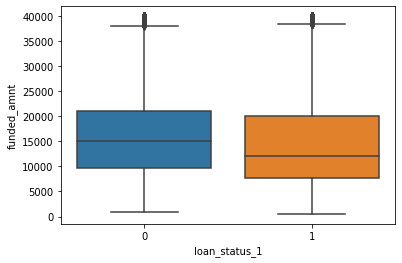

In [192]:
sns.boxplot(x='loan_status_1', y='funded_amnt', data=loan2);

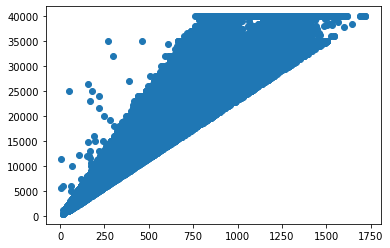

In [193]:
plt.scatter(loan2['installment'], loan2['funded_amnt']);

### Annual Income

In [194]:
#np.round(loan2.agg({'annual_inc': ['min', 'mean', 'median','max']}))

In [195]:
#plt.figure(figsize=(10,5))
#plt.scatter(loan2['annual_inc'], loan2['funded_amnt'])
#plt.title("Annual Income against Funded Amount")
#plt.ylabel('Loan Value')
#plt.xlabel('Annual Income')
#plt.show()

In [196]:
#calculate outliers
#drop outliers
# rerun chart
#does annual income affect default

In [197]:
#calculate IQR
#Q1 = loan2.annual_inc.quantile(.25)
#Q3 = loan2.annual_inc.quantile(.75)
#IQR = Q3 - Q1
#IQR

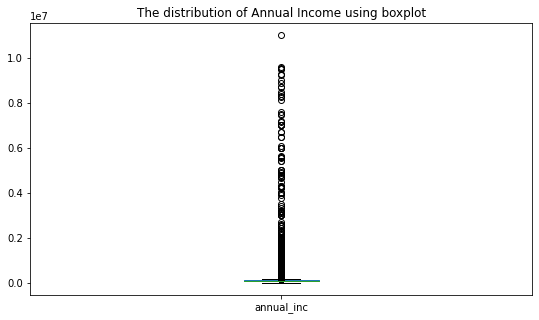

In [198]:
loan2['annual_inc'].plot.box(figsize=(9,5));
plt.title('The distribution of Annual Income using boxplot');

In [199]:
#funded Amount

In [200]:
#employment length
#clean str
#look at distribution
#longer employment means better rate

In [201]:
#homeowners
#dummify or map
#how many own their home

In [202]:
#grade

In [203]:
#interest rate
#based on purpose
#interest increases with grade
#loan amount and interest rate

### Default Rate and Grade

https://www.lendingclub.com/foliofn/rateDetail.action Lending Tree uses a formula for their loan grade system that takes in account not only credit score, but also a combination of several indicators of credit risk from the credit report application. All loans have either a 36-or-60 month term, with fixed interest rates and equal payments. A rate of "A" is the highest with a value of 7 and "G" the lowest with a value of 1.

In [204]:
loan2['grade'].value_counts()

B    376874
C    370020
A    224495
D    195019
E     91402
F     31330
G      9040
Name: grade, dtype: int64

In [205]:
loan2['grade1'] = loan2['grade'].replace({"A": 7,
                                    "B": 6, "C": 5, 
                                    "D":4, 
                                    "E":3,
                                    "F":2, "G": 1
                                                      })

In [206]:
loan2['grade1'].value_counts()

6    376874
5    370020
7    224495
4    195019
3     91402
2     31330
1      9040
Name: grade1, dtype: int64

### Interest Rate

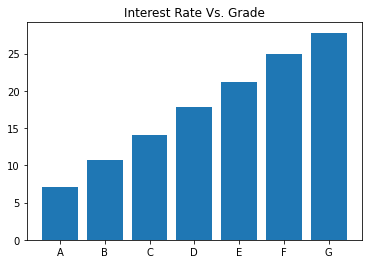

In [207]:
interest_by_grade=loan2[['int_rate','grade']].groupby('grade').mean()
plt.bar(x=interest_by_grade.index,height=interest_by_grade['int_rate'])
plt.title('Interest Rate Vs. Grade');

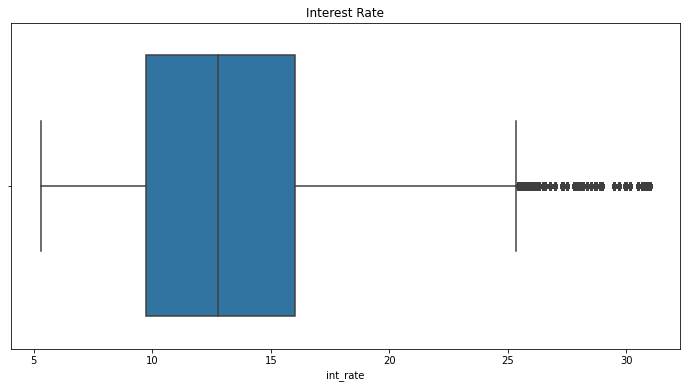

In [208]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.boxplot(x='int_rate',data=loan2,ax=ax);
plt.title('Interest Rate');

In [209]:
loan2[loan2['int_rate']>25]['loan_status_1'].value_counts()

0    13788
1    13048
Name: loan_status_1, dtype: int64

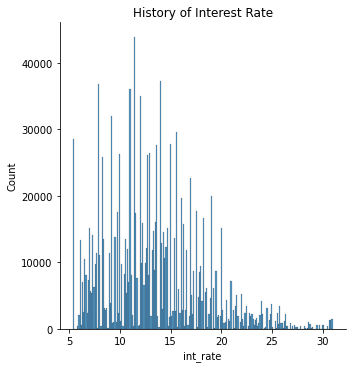

In [210]:
sns.displot(loan2['int_rate']);
plt.title('History of Interest Rate');

**Interest rate is highly correlated with grade. Riskier the grade more is the interest rate.**

#### Return on Investment (ROI)
ROI = total_pymnt (amount returned by the borrower)/funded_amnt

In [211]:
roi=loan2[['total_pymnt','funded_amnt','loan_status_1','grade']]
roi1=(roi['total_pymnt'].sum()/roi['funded_amnt'].sum()-1)*100
print("ROI:",round(roi1,2))

ROI: 1.72


In [212]:
roi2=roi.groupby('grade').sum()
ROI_by_grade=roi2['total_pymnt']/roi2['funded_amnt'] -1
ROI_by_grade

grade
A    0.049057
B    0.042620
C    0.012619
D   -0.010130
E   -0.021343
F   -0.043788
G   -0.091537
dtype: float64

In [213]:
roi=loan2[loan2['loan_status_1']==1][['total_pymnt','funded_amnt','loan_status','grade']]
roi1=(roi['total_pymnt'].sum()/roi['funded_amnt'].sum()-1)*100
print("ROI for fully paid loans:",round(roi1,2))

ROI for fully paid loans: 16.52


In [214]:
roi2=roi.groupby('grade').sum()
fully_paid_ROI_by_grade=roi2['total_pymnt']/roi2['funded_amnt'] -1
fully_paid_ROI_by_grade

grade
A    0.086432
B    0.133985
C    0.180411
D    0.228138
E    0.282030
F    0.328994
G    0.323334
dtype: float64

#### Notes:
Total ROI is in negative as we are considering defaulted records also. As defaulted records generally have higher loan amounts, it moves overall ROI to negative side.
For riskier grades, overall ROI (incl. defaulted loans) decreases.
If we consider fully paid loans, then ROI is more for riskier grades.

### Employment History

The length of employment feature was an object that contained strings, n/a, <, >, which were removed then it was convert to numeric.

In [215]:
def employment_length(text):
    text = text.lower()
    
    if text == 'nan':
        text = '0'
    elif text == 'n/a':
        text = '0'
    elif text == '< 1 year':
        text = '0.5'
    elif text == '1 year':
        text = '1'
    elif text == '2 years':
        text = '2'
    elif text == '3 years':
        text = '3'
    elif text == '4 years':
        text = '4'
    elif text == '5 years':
        text = '5'
    elif text == '6 years':
        text = '6'
    elif text == '7 years':
        text = '7'
    elif text == '8 years':
        text = '8'
    elif text == '9 years':
        text = '9'
    elif text == '10+ years':
        text = '10'
            
    return text

In [216]:
loan2['emp_length'] = loan2['emp_length'].astype('str')
loan2['emp_length'] = [employment_length(i) for i  in loan2['emp_length']]
loan2['emp_length'] = loan2['emp_length'].astype('float')

In [217]:
loan2['emp_length'].head()

0    10.0
1    10.0
2    10.0
4     3.0
5     4.0
Name: emp_length, dtype: float64

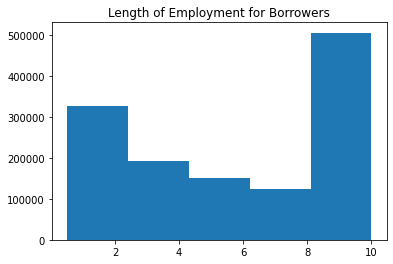

In [218]:
plt.hist(loan2['emp_length'], bins=5);
plt.title('Length of Employment for Borrowers');

### Funded Amount

In [219]:
loan2['funded_amnt'].describe()

count    1.298180e+06
mean     1.466286e+04
std      8.779954e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.232500e+04
75%      2.000000e+04
max      4.000000e+04
Name: funded_amnt, dtype: float64

**The minimum amount of a funded amount issued to a borrower was 500 and the maximum was 40k.**

In [220]:
loan2.groupby(by='loan_status_1')['funded_amnt'].describe()    

,count,mean,std,min,25%,50%,75%,max
loan_status_1,,,,,,,,
0,278825.0,16050.919304,8952.431438,900.0,9600.0,15000.0,21000.0,40000.0
1,1019355.0,14283.180810,8693.671615,500.0,7675.0,12000.0,20000.0,40000.0


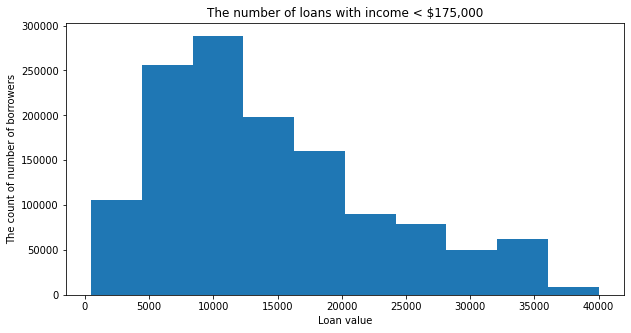

In [221]:
plt.figure(figsize=(10,5))
plt.hist(loan2['funded_amnt']);
plt.xlabel('Loan value');
plt.ylabel('The count of number of borrowers')
plt.title('The number of loans with income < $175,000');

### Annual Income

In [222]:
np.round(loan2.agg({'annual_inc': ['min', 'mean', 'median','max']}))

,annual_inc
min,32.0
mean,77977.0
median,65000.0
max,10999200.0


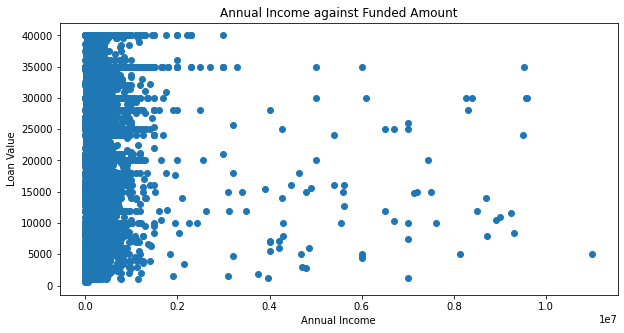

In [223]:
plt.figure(figsize=(10,5))
plt.scatter(loan2['annual_inc'], loan2['funded_amnt'])
plt.title("Annual Income against Funded Amount")
plt.ylabel('Loan Value')
plt.xlabel('Annual Income')
plt.show()

In [224]:
## calculate outliers

In [225]:
loan2.drop(loan2[loan2['annual_inc'] >200000].index, inplace = True)

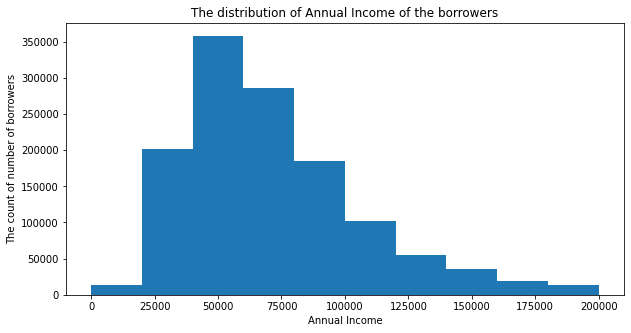

In [226]:
plt.figure(figsize=(10,5))
plt.hist(loan2['annual_inc']);
plt.xlabel('Annual Income');
plt.ylabel('The count of number of borrowers')
plt.title('The distribution of Annual Income of the borrowers');

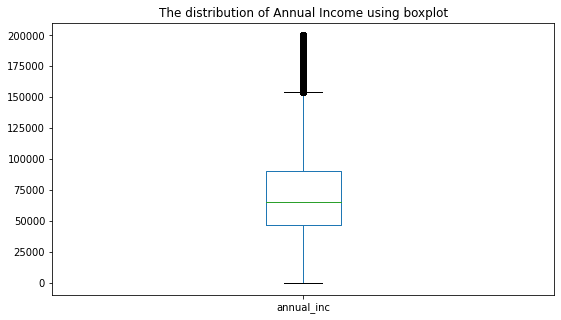

In [227]:
loan2['annual_inc'].plot.box(figsize=(9,5));
plt.title('The distribution of Annual Income using boxplot');

In [228]:
loan2['annual_inc'].describe()

count    1.269668e+06
mean     7.255795e+04
std      3.500654e+04
min      3.200000e+01
25%      4.700000e+04
50%      6.500000e+04
75%      9.000000e+04
max      2.000000e+05
Name: annual_inc, dtype: float64

In [229]:
loan2.shape

(1269668, 20)

#### Notes - histogram, scatterplot
- The scatter plot was done using all of the data.  A large number of borrowers income were less 200,000 annual
- Removed all income greater than 200,000 annually.  The histogram displays more distributed and skewed left chart.
- The box plot displays mean income at 65,000

### Term

In [230]:
#distribution of loan by terms, loan status
loan2.groupby('term')['loan_status_1'].mean()

term
 36 months    0.829242
 60 months    0.649131
Name: loan_status_1, dtype: float64

### Home Ownership

In [231]:
loan2['home_ownership'].value_counts()

MORTGAGE    624112
RENT        515471
OWN         129622
ANY            279
OTHER          138
NONE            46
Name: home_ownership, dtype: int64

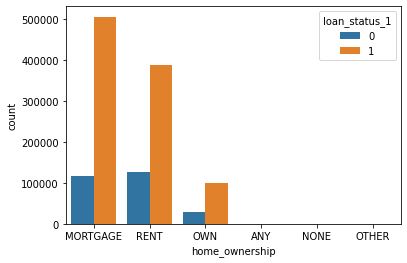

In [232]:
sns.countplot(x='home_ownership',hue='loan_status_1',data=loan2);

In [233]:
#change OHTER, NONE, ANY to RENT as these data points are too low.
loan2['home_ownership']=loan2['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE','ANY'] else x)

In [234]:
loan2['home_ownership'].value_counts()

MORTGAGE    624112
RENT        515934
OWN         129622
Name: home_ownership, dtype: int64

### Purpose

In [235]:
loan2['purpose'].value_counts()

debt_consolidation    741753
credit_card           277192
home_improvement       79393
other                  72878
major_purchase         27879
small_business         14731
medical                14353
car                    13828
moving                  8951
vacation                8476
house                   6807
wedding                 2229
renewable_energy         882
educational              316
Name: purpose, dtype: int64

In [236]:
# calculate % of purpose

### State Address

In [237]:
loan2['addr_state'].value_counts()

CA    185397
TX    104995
NY    103526
FL     88922
IL     48937
NJ     45655
PA     43251
OH     41297
GA     40856
VA     36256
NC     35347
MI     32399
AZ     30334
MD     30065
MA     29685
CO     28254
WA     27556
MN     23138
IN     20621
MO     20087
TN     19191
NV     18617
CT     18582
WI     16890
AL     15606
OR     15295
SC     14828
LA     14807
KY     12042
OK     11643
KS     10682
UT      9563
AR      9296
NM      6832
HI      6553
MS      6233
NH      6121
RI      5612
WV      4491
MT      3634
DE      3531
NE      3498
DC      3320
AK      3099
WY      2834
SD      2675
VT      2545
ME      1888
ND      1595
ID      1580
IA         7
Name: addr_state, dtype: int64

### dti

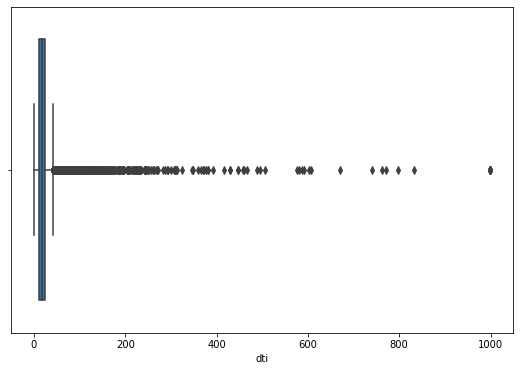

In [238]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.boxplot(x='dti',data=loan2,ax=ax);

In [ ]:
sns.displot(loan2['dti']);

In [ ]:
#d_issuse - year that the loans are issued
#break apart by year - groupby year

## Correlation

**A correlation coefficient tells us if there are any dependencies between the independent variables**

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(loan2.corr(), cmap='Blues',
           annot=True);
plt.title('Correlaation coefficient of numerical features');

In [ ]:
# balance the y - not sure if to do - maybe do with and without
#use code from project 5 models
#code the best - gs
#confusion matrix